In [1]:
import warnings
warnings.filterwarnings('ignore')

# read data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ewing-data.csv")

In [4]:
data.columns

Index(['treat', 'ldh', 'time', 'outcome'], dtype='object')

In [5]:
data.describe()

,treat,ldh,time,outcome
count,76.000000,76.000000,76.000000,76.000000
mean,0.618421,0.407895,1110.342105,0.605263
std,0.489002,0.494709,941.904985,0.492042
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,337.750000,0.000000
50%,1.000000,0.000000,882.000000,1.000000
75%,1.000000,1.000000,1660.250000,1.000000
max,1.000000,1.000000,3743.000000,1.000000


In [6]:
col_Z = 'ldh' # 'race''paro''mar'
col_X = 'treat' # fin
col_time = 'time' # week
col_status = 'outcome' # arrest
max_time = int(data[col_time].max())

In [7]:
print("X=0:", data[(data[col_X] == 0)].shape[0])
print("X=1:", data[(data[col_X] == 1)].shape[0])
print("Z=0:", data[(data[col_Z] == 0)].shape[0])
print("Z=1:", data[(data[col_Z] == 1)].shape[0])

X=0: 29
X=1: 47
Z=0: 45
Z=1: 31


In [8]:
def label_survival(row, index):
    if ((row[col_time] <= (index + 0.5)) & (row[col_status] == 1)): # time
        return 0
    return 1

In [9]:
for i in range(max_time):
    col_name = 'Y' + str(i)
    data[col_name] = data.apply(lambda row: label_survival(row, i), axis=1)

In [10]:
backup = data.copy()

In [11]:
data
#data[['Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29']]

,treat,ldh,time,outcome,Y0,Y1,Y2,Y3,Y4,Y5,...,Y3733,Y3734,Y3735,Y3736,Y3737,Y3738,Y3739,Y3740,Y3741,Y3742
0,1,0,31,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,335,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,366,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,426,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,456,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,457,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
72,0,1,761,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
73,0,1,1249,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
74,0,1,1310,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


---

In [12]:
clustered_data = pd.DataFrame()
clustered_data

""


In [13]:
z_0_count = data[data[col_Z] == 0].shape[0]
z_1_count = data[data[col_Z] == 1].shape[0]
P_z_0 = z_0_count / (z_0_count + z_1_count)
P_z_1 = z_1_count / (z_0_count + z_1_count)

coeff = {}
# (z,x)
coeff[(0, 0)] = P_z_0# P(z=0)
coeff[(0, 1)] = P_z_0# P(z=0)
coeff[(1, 0)] = P_z_1# P(z=1)
coeff[(1, 1)] = P_z_1# P(z=1)
coeff

{(0, 0): 0.5921052631578947,
 (0, 1): 0.5921052631578947,
 (1, 0): 0.40789473684210525,
 (1, 1): 0.40789473684210525}

In [14]:
# index = 0
# col_Y = 'Y'+str(index)

# clustered_data['adj_p_' + str(index)] = 0

# subgroup = data[(data[col_Z] == 0)]
# subgroup = subgroup[(subgroup[col_X] == 1)]
# if (index > 0):
#     subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
# try:
#     P_y_1_x_1_z_0 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
# except ZeroDivisionError:
#     P_y_1_x_1_z_0 = 0

# subgroup = data[(data[col_Z] == 1)]
# subgroup = subgroup[(subgroup[col_X] == 1)]
# if (index > 0):
#     subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
# try:
#     P_y_1_x_1_z_1 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
# except ZeroDivisionError:
#     P_y_1_x_1_z_1 = 0

# subgroup = data[(data[col_Z] == 0)]
# subgroup = subgroup[(subgroup[col_X] == 0)]
# if (index > 0):
#     subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
# try:
#     P_y_1_x_0_z_0 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
# except ZeroDivisionError:
#     P_y_1_x_0_z_0 = 0

# subgroup = data[(data[col_Z] == 1)]
# subgroup = subgroup[(subgroup[col_X] == 0)]
# if (index > 0):
#     subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
# try:
#     P_y_1_x_0_z_1 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
# except ZeroDivisionError:
#     P_y_1_x_0_z_1 = 0

# P_adj_y_x0 = P_y_1_x_0_z_0 * coeff[(0, 0)] + P_y_1_x_0_z_1 * coeff[(1, 0)]
# P_adj_y_x1 = P_y_1_x_1_z_0 * coeff[(0, 1)] + P_y_1_x_1_z_1 * coeff[(1, 1)]

# clustered_data.loc[0, 'adj_p_' + str(index)] = P_adj_y_x0
# clustered_data.loc[1, 'adj_p_' + str(index)] = P_adj_y_x1

# # (z,x)
# coeff[(0, 0)] = P_y_1_x_0_z_0 * coeff[(0, 0)]
# coeff[(0, 1)] = P_y_1_x_1_z_0 * coeff[(0, 1)]
# coeff[(1, 0)] = P_y_1_x_0_z_1 * coeff[(1, 0)]
# coeff[(1, 1)] = P_y_1_x_1_z_1 * coeff[(1, 1)]

In [15]:
for index in range(max_time):
    col_Y = 'Y'+str(index)

    clustered_data['adj_p_' + str(index)] = 0

    subgroup = data[(data[col_Z] == 0)]
    subgroup = subgroup[(subgroup[col_X] == 1)]
    if (index > 0):
        subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
    try:
        P_y_1_x_1_z_0 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
    except ZeroDivisionError:
        P_y_1_x_1_z_0 = 0

    subgroup = data[(data[col_Z] == 1)]
    subgroup = subgroup[(subgroup[col_X] == 1)]
    if (index > 0):
        subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
    try:
        P_y_1_x_1_z_1 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
    except ZeroDivisionError:
        P_y_1_x_1_z_1 = 0

    subgroup = data[(data[col_Z] == 0)]
    subgroup = subgroup[(subgroup[col_X] == 0)]
    if (index > 0):
        subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
    try:
        P_y_1_x_0_z_0 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
    except ZeroDivisionError:
        P_y_1_x_0_z_0 = 0

    subgroup = data[(data[col_Z] == 1)]
    subgroup = subgroup[(subgroup[col_X] == 0)]
    if (index > 0):
        subgroup = subgroup[(subgroup['Y'+str(index-1)] == 1)]
    try:
        P_y_1_x_0_z_1 = subgroup[(subgroup[col_Y] == 1)].shape[0] / subgroup.shape[0]
    except ZeroDivisionError:
        P_y_1_x_0_z_1 = 0

    P_adj_y_x0 = P_y_1_x_0_z_0 * coeff[(0, 0)] + P_y_1_x_0_z_1 * coeff[(1, 0)]
    P_adj_y_x1 = P_y_1_x_1_z_0 * coeff[(0, 1)] + P_y_1_x_1_z_1 * coeff[(1, 1)]

    clustered_data.loc[0, 'adj_p_' + str(index)] = P_adj_y_x0
    clustered_data.loc[1, 'adj_p_' + str(index)] = P_adj_y_x1

    # (z,x)
    coeff[(0, 0)] = P_y_1_x_0_z_0 * coeff[(0, 0)]
    coeff[(0, 1)] = P_y_1_x_1_z_0 * coeff[(0, 1)]
    coeff[(1, 0)] = P_y_1_x_0_z_1 * coeff[(1, 0)]
    coeff[(1, 1)] = P_y_1_x_1_z_1 * coeff[(1, 1)]

In [16]:
clustered_data

,adj_p_0,adj_p_1,adj_p_2,adj_p_3,adj_p_4,adj_p_5,adj_p_6,adj_p_7,adj_p_8,adj_p_9,...,adj_p_3733,adj_p_3734,adj_p_3735,adj_p_3736,adj_p_3737,adj_p_3738,adj_p_3739,adj_p_3740,adj_p_3741,adj_p_3742
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.376731,0.376731,0.376731,0.376731,0.376731,0.376731,0.376731,0.376731,0.376731,0.376731
1,0.966009,0.966009,0.966009,0.966009,0.966009,0.966009,0.966009,0.966009,0.966009,0.966009,...,0.389098,0.389098,0.389098,0.389098,0.389098,0.389098,0.389098,0.389098,0.389098,0.389098


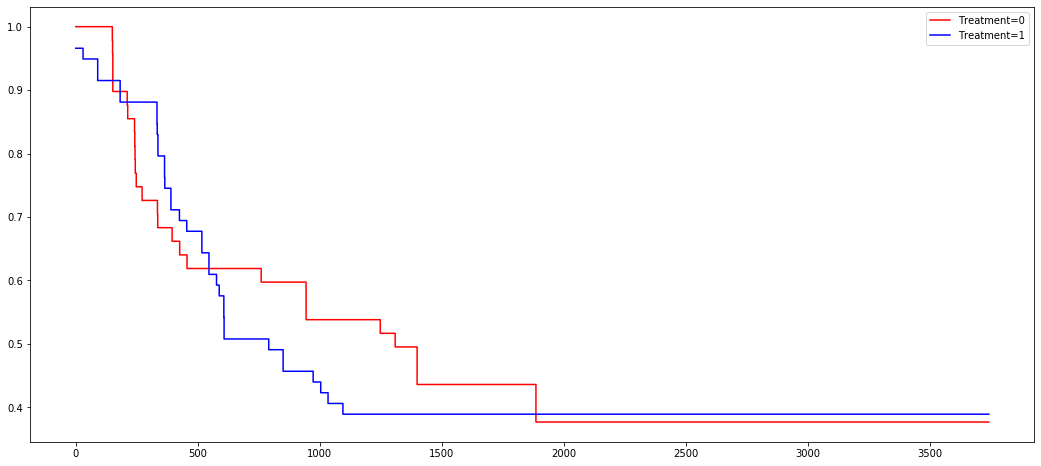

In [17]:
t = []
x0_adj = []
x1_adj = []

t = np.arange(max_time)
    
for index, value in clustered_data.iloc[0].iteritems(): 
    x0_adj.append(value)

for index, value in clustered_data.iloc[1].iteritems(): 
    x1_adj.append(value)

# plt.figure(figsize=(18,8))
plt.figure()
plt.step(t, x0_adj, 'r', label='Treatment=0') # plotting t, a separately 
plt.step(t, x1_adj, 'b', label='Treatment=1') # plotting t, b separately
plt.legend()
# plt.show() 
plt.savefig('adjusted_ewing.eps', bbox_inches='tight')

---

In [18]:
multiplier = [data[(data[col_X] == 0)].shape[0], data[(data[col_X] == 1)].shape[0]]
clustered_data_count = clustered_data.mul(multiplier, axis=0).round()
clustered_data_count

,adj_p_0,adj_p_1,adj_p_2,adj_p_3,adj_p_4,adj_p_5,adj_p_6,adj_p_7,adj_p_8,adj_p_9,...,adj_p_3733,adj_p_3734,adj_p_3735,adj_p_3736,adj_p_3737,adj_p_3738,adj_p_3739,adj_p_3740,adj_p_3741,adj_p_3742
0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [19]:
adj_data = pd.DataFrame(columns=['X', 'Y', 'status'])


count_patient_x0 = data[(data[col_X] == 0)].shape[0]
for i in range(max_time):
    col = 'adj_p_'+str(i)
    alive_count_x0 = int(clustered_data_count.at[0, col])
    if (alive_count_x0 < count_patient_x0):
        died_x0 = count_patient_x0 - alive_count_x0
        for k in range(died_x0):
            adj_data = adj_data.append({'X': 0, 'Y': i, 'status': 1} , ignore_index=True)
        count_patient_x0 = alive_count_x0
if (count_patient_x0 > 0):
    for k in range(count_patient_x0):
        adj_data = adj_data.append({'X': 0, 'Y': max_time, 'status': 0} , ignore_index=True)
        
        
count_patient_x1 = data[(data[col_X] == 1)].shape[0]
for i in range(max_time):
    col = 'adj_p_'+str(i)
    alive_count_x1 = int(clustered_data_count.at[1, col])
    if (alive_count_x1 < count_patient_x1):
        died_x1 = count_patient_x1 - alive_count_x1
        for k in range(died_x1):
            adj_data = adj_data.append({'X': 1, 'Y': i, 'status': 1} , ignore_index=True)
        count_patient_x1 = alive_count_x1
if (count_patient_x1 > 0):
    for k in range(count_patient_x1):
        adj_data = adj_data.append({'X': 1, 'Y': max_time, 'status': 0} , ignore_index=True)

In [20]:
adj_data['X'] = adj_data.X.astype(float)
adj_data['Y'] = adj_data.Y.astype(float)
adj_data['status'] = adj_data.status.astype(float)

In [21]:
adj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
X         76 non-null float64
Y         76 non-null float64
status    76 non-null float64
dtypes: float64(3)
memory usage: 1.9 KB


In [22]:
adj_data.describe()

,X,Y,status
count,76.000000,76.000000,76.000000
mean,0.618421,1775.197368,0.618421
std,0.489002,1594.858916,0.489002
min,0.000000,0.000000,0.000000
25%,0.000000,358.250000,0.000000
50%,1.000000,898.000000,1.000000
75%,1.000000,3743.000000,1.000000
max,1.000000,3743.000000,1.000000


In [23]:
print("X=0:", adj_data[(adj_data['X'] == 0)].shape[0])
print("X=1:", adj_data[(adj_data['X'] == 1)].shape[0])

X=0: 29
X=1: 47


In [24]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

In [25]:
cph = CoxPHFitter()
cph.fit(adj_data, 'Y', 'status', show_progress=True)
cph.print_summary()

Iteration 3: norm_delta = 0.00005, step_size = 0.9500, ll = -184.95725, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 3 iterations.
<lifelines.CoxPHFitter: fitted with 76 total observations, 29 right-censored observations>
             duration col = 'Y'
                event col = 'status'
   number of observations = 76
number of events observed = 47
   partial log-likelihood = -184.96
         time fit was run = 2020-03-25 16:56:45 UTC

---
    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
X   0.04       1.04       0.30            -0.55             0.62                 0.57                 1.87

     z    p   -log2(p)
X 0.12 0.91       0.14
---
Concordance = 0.50
Log-likelihood ratio test = 0.01 on 1 df, -log2(p)=0.14


In [26]:
adj_data.to_csv(r'adj_surv_data_transformB.csv', index = None, header=True)